<a href="https://colab.research.google.com/github/ryan-keenan/Data-C4/blob/master/Rideshare_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rideshare Project Part 3
<img src="https://data.cityofchicago.org/api/assets/73F1665C-0FE6-4183-8AD1-E91DB8EFAFA4?7CB02402-8E06-48B0-8C9A-3890182D58C7.png" width=400 alt="Drawing" style="width: 200px;"/>

The city of Chicago has hired you as an analyst to dive into their recently published a dataset containing detailed information about all rides taken with rideshare providers like Uber and Lyft in Chicago and surrounding areas From November 2018 through March 2019.

The dataset you'll be investigating in this notebook is the same one you looked at in the Google Sheets lab, comprising two weeks worth of data from Dec. 21, 2018 to Jan. 3, 2019. This dataset has been downsampled by a factor of 500 to reduce the size, meaning that only every 500th record from this time period in the original dataset is included here. 

*Note: Some columns of unnessary or redundant information have been removed from the original data set and columns for Year, Month, Weekday and Hour of Day have been added for convenience. The original published data was anonymized by rounding off dollar amounts and times of day. To make the data more realistic looking we have added random noise to the Fare, Tip, Latitude and Longitude columns.*

**The first few steps of this project (reading in the data, removing null values and investigating descriptive statistics) are the same as for parts 1 and 2 of this project.**

### Scenario for this section of the project:
> The city of Chicago now wants you create a model for predicting the number of rides per hour. Your goal is to create a model that the city can use to estimate the economic impact of rideshare activities over time. Follow along in this notebook to create your model! 

## Objectives for this Python lab:
Some of the steps you will complete in this lab are effectively the same as you did in the Sheets lab, but now in a Python environment. Other steps are completely new. The overlap between this lab and the previous Sheets lab is intended to show you how some things work in Python that you're already familiar with in Sheets, and the new steps are to demonstrate where Python allows you to easily do things that would be very difficult or impossible in Sheets. Here are your objectives for this lab:

1. Read in the dataset and compute summary statistics.

2. Compute and investigate new columns of data.

3. Compute and interpret confidence intervals for driver income.

The code for all these objectives is already written for you. All you need to do is press "Shift+Enter" on your keboard after selecting each cell to run the code. <mark>Be sure to run all the cells in order because some of the steps need to happen in a sequence</mark>. At a few points we give suggestions for making simple modifications to the code. Feel free to experiment with more if you're feeling curious!

### Objective 1: Read in the dataset and compute summary statistics.

**1.1 Investigate the data source (if you haven't already).**

As always, a great first step before you jump into your analysis is to check out the source of your data. You can find out more about this exciting dataset [here](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p/data).

In [0]:
# Import the pandas library for reading and manipulating your data
# Anywhere you see "pd" in this notebook it's a reference to the pandas library
import pandas as pd
# Extra step to ensure that pandas plays nice with matplotlib
pd.plotting.register_matplotlib_converters()
# Import the numpy library for running calculations on your data
# Anywhere you see "np" in this notebook it's a reference to the numpy library
import numpy as np
# Import some components of the matplotlib library for plotting your data
# Anywhere you see "plt" or "mpimg" in this notebook it's a reference to the "pyplot" and "image" packages from matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Import seaborn library for making your plots pretty!
# Anywhere you see "sns" in this notebook it's a reference to the seaborn library
import seaborn as sns
# Set some default plotting parameters using seaborn
sns.set()


**1.3 Read in the dataset.**

With the code below, you will use the `pandas` code library to read a csv (comma separated value) file containing your data into an object called "`df`". In this case, `df` is short for dataframe, which is a type of object used for storing rows and columns of data.

Run the following cell (select and press play or "Shift+Enter" on the keyboard) to complete this step. 



In [0]:
# Read the data into a dataframe called "df".
url = "https://raw.githubusercontent.com/ryan-keenan/Data-C4/master/rideshare_holidays.csv"
df = pd.read_csv(url, parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

**1.4 Inspect the dataset.**

Run the following cell to look at the column names and first few rows of your data. Be sure to scroll to the right to see all the columns. 

You can explore the [city of Chicago website for this dataset](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p/data) further to learn more about each column.

In [3]:
# Print the column names and first five rows of the dataset contained in df
# Note: to look at more than 5 rows just enter a number in the parentheses e.g., "df.head(10)"
df.head()

,Trip Start Timestamp,Trip ID,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Weekday,Hour of Day
0,2018-12-21 00:15:00,205df3934c192419191fee0cd59d937e428ce943,2018-12-21 00:15:00,179.0,0.8,6.0,6.0,3.355505,0.0,2.5,5.855505,False,1,41.943193,-87.652933,41.934605,-87.647185,2018,12,Friday,0
1,2018-12-21 00:15:00,21e57f6045a88120fb44ed6e5f3ef3056ec49397,2018-12-21 00:15:00,405.0,0.8,8.0,8.0,5.372322,0.0,2.5,7.872322,False,1,41.893997,-87.619736,41.892972,-87.612612,2018,12,Friday,0
2,2018-12-21 00:15:00,571289f1acbfc37f0f6cc7374521b6925a68fe17,2018-12-21 00:30:00,312.0,0.9,8.0,32.0,12.564570,0.0,3.8,16.364570,False,1,41.892318,-87.632273,41.877202,-87.620371,2018,12,Friday,0
3,2018-12-21 00:15:00,32a2fc1023c5fed0cb7170783b6d5ef62bfa2803,2018-12-21 00:30:00,373.0,1.4,6.0,5.0,5.293349,0.0,3.0,8.293349,False,1,41.945562,-87.654244,41.951144,-87.684893,2018,12,Friday,0
4,2018-12-21 00:15:00,71545f540b6681e7f7ecf2b1ac6c96c1c2d12f92,2018-12-21 00:45:00,1165.0,5.2,8.0,6.0,8.312059,0.0,4.0,12.312059,True,3,41.908317,-87.635508,41.956913,-87.666823,2018,12,Friday,0


**1.4 Explore column data types and the presence of null / missing values.**

In the cells below, running `df.shape` prints out the shape of the dataset and `df.info()` prints out each column name along with the total number of non-null values in that column and its data type. Investigate the output and see what you find!

In [4]:
# Display the shape of this dataset
df.shape

(6572, 21)

In [5]:
# Print information about the total number of non-null values and data types in each column of your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6572 entries, 0 to 6571
Data columns (total 21 columns):
Trip Start Timestamp          6572 non-null datetime64[ns]
Trip ID                       6572 non-null object
Trip End Timestamp            6572 non-null datetime64[ns]
Trip Seconds                  6572 non-null float64
Trip Miles                    6572 non-null float64
Pickup Community Area         6137 non-null float64
Dropoff Community Area        6094 non-null float64
Fare                          6572 non-null float64
Tip                           6572 non-null float64
Additional Charges            6572 non-null float64
Trip Total                    6572 non-null float64
Shared Trip Authorized        6572 non-null bool
Trips Pooled                  6572 non-null int64
Pickup Centroid Latitude      6143 non-null float64
Pickup Centroid Longitude     6143 non-null float64
Dropoff Centroid Latitude     6098 non-null float64
Dropoff Centroid Longitude    6098 non-null float64
Y

**1.5 Handle missing values**

 If there are null/missing values in your data, you will sometimes want to eliminate those rows from the dataset, or change them to an acceptable value. In some cases, null values may be interesting to explore further. For this project, you can choose to simply leave the null values alone or remove records with null values. 

---

If you want to remove all records containing null values, make a note of why you've decided to do this and then run the next cell after removing the "#" from the beginning of the line that says `df.dropna(inplace=True)` to drop all rows containing null values. If you choose not to remove missing values you can skip the next cell. 

In [0]:
# Remove all rows that contain any null values
#df.dropna(inplace=True) 
# Print information about the total number of non-null values and data types in each column of your dataframe
#df.info()

**1.6 Investigate summary statistics.**

Run the cell below to compute and display summary statistics for your dataset. The output will be a table containing the count, mean, standard deviation, min, max and 25%, 50% (median) and 75% (Q1-Q3) quartiles for all columns. 

In [7]:
# Print out summary statistics for all columns
df.describe()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Hour of Day
count,6572.000000,6572.000000,6137.000000,6094.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6143.000000,6143.000000,6098.000000,6098.000000,6572.000000,6572.000000,6572.000000
mean,984.649726,6.041464,25.078051,25.864621,11.527415,0.623478,3.080157,15.231050,1.274194,41.891893,-87.666306,41.893166,-87.668781,2018.225198,9.522824,13.295648
std,661.072357,6.551493,20.224738,20.680509,8.901855,1.704084,1.858867,10.499637,0.674322,0.063000,0.057941,0.062589,0.063210,0.417744,4.595187,6.608478
min,67.000000,0.000000,1.000000,1.000000,0.019438,0.000000,0.000000,0.700983,1.000000,41.649067,-87.915590,41.649354,-87.915528,2018.000000,1.000000,0.000000
25%,505.750000,1.800000,8.000000,8.000000,5.883585,0.000000,2.500000,8.764584,1.000000,41.875980,-87.683859,41.877700,-87.684682,2018.000000,12.000000,9.000000
50%,818.000000,3.700000,24.000000,24.000000,8.603869,0.000000,3.000000,11.989529,1.000000,41.897210,-87.653495,41.897027,-87.652287,2018.000000,12.000000,14.000000
75%,1300.000000,7.500000,32.000000,32.000000,13.411816,0.000000,3.050000,17.409890,1.000000,41.930616,-87.631441,41.933172,-87.631603,2018.000000,12.000000,19.000000
max,6472.000000,83.500000,77.000000,77.000000,121.016974,30.500000,15.300000,123.816974,6.000000,42.022373,-87.534121,42.020109,-87.533848,2019.000000,12.000000,23.000000


### Objective 2: Build a simple model of rideshare useage over time

The data set you're working with contains a sampling (one out of every 500) of rides over the 2018/2019 holiday season (Dec. 21, 2018 through Jan. 3, 2019). Your first step toward creating a model of rideshare usage over time will be to simply calculate the average number of rides per day over this holiday period.

#### 2.1 Calculate average rides per day

Run the cell below to calculate the average number of rides per day over the 2018/2019 holiday season and plot that average against the actual number of rides taken each day. 

In [8]:
# Set the start date/time as the first timestamp in the dataframe
start_timestamp = df["Trip Start Timestamp"].iloc[0]
# Set the end date/time as the last timestamp in the dataframe
end_timestamp = df["Trip Start Timestamp"].iloc[-1]
# Calculate the time difference in seconds between start and end date
time_delta = end_timestamp - start_timestamp
# Convert the time difference from seconds to days
total_days = time_delta.total_seconds()/3600/24
# Compute the actual total rides per day by multiplying the total number of records by 500 (the downsampling factor)
# and dividing by the number of days spanned by the sample
rides_per_day = 500*len(df)/total_days
# Print out the average number of rides per day and standard error
print(f'Average Number of rides per day over the holiday season: {rides_per_day:.0f}')

Average Number of rides per day over the holiday season: 235064



Run the next cell to plot the average rides per day you calculated above over a histogram of actual rides per day over the holiday period.

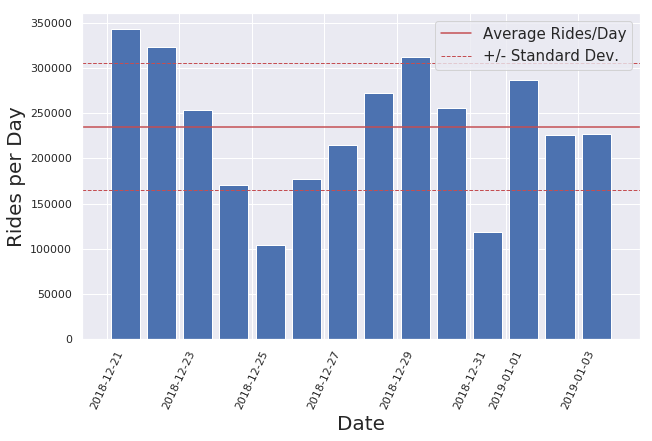

Number of rides per day over the holiday season: 235064 +/- 70288
Average taken over 14 days


In [9]:
# Set how big to plot the figure below this cell showing rides per day.
plt.figure(figsize=(10,6))
# Create a histogram by counting up the total number rides per day in the entire dataframe
rides_hist = plt.hist(df['Trip Start Timestamp'], bins=round(total_days))
# Determine the center of the bins used in the histogram
bin_center = (rides_hist[1][:-1] + rides_hist[1][1:]) / 2
# Compute the standard deviation of the histogram over days (and multiply by 500 to account for downsampling)
sigma_holidays = np.std(rides_hist[0])*500
# Overwrite the plot to convert the y-axis to "rides per day" (multiplying by 500)
plt.bar(bin_center, rides_hist[0]*500)
plt.xticks(rotation=65)  # Rotate the x tick labels for readability
# Add labels to the x and y axes
plt.ylabel('Rides per Day', fontsize=20)
plt.xlabel('Date', fontsize=20)
# Plot the average as a horizontal red line
plt.axhline(y=rides_per_day, xmin=0, xmax=1, c='r', label='Average Rides/Day')
# Overlay the average +/- SEM as red dashed lines
plt.axhline(y=rides_per_day + sigma_holidays, xmin=0, xmax=1, c='r', linestyle='dashed', linewidth=1, label='+/- Standard Dev.')
plt.axhline(y=rides_per_day - sigma_holidays, xmin=0, xmax=1, c='r', linestyle='dashed', linewidth=1)
plt.legend(fontsize=15)
plt.show()

# Print out the average number of rides per day and standard error
print(f'Number of rides per day over the holiday season: {rides_per_day:.0f} +/- {sigma_holidays:.0f}')
print(f'Average taken over {total_days:.0f} days')

Congratulations! You just made a model of rideshare usage over time! The solid red line in the plot above represents the average number of rides per day over the holiday period and the dashed red lines represent the standard deviation. In other words, the mean for this sample is shown in solid red, and your 68% confidence interval for how many rides there will be on any given day in the future is shown by the dashed red lines.  

### Questions:

1. What fraction of days during this period had a number of rides that was within the 68% confidence interval of your model?
2. What might you do to improve your model?

### Step 7: Gather more data
One of the first things you might be curious about at this point is whether the holiday data is really representative of rideshare useage over different or longer time periods. More specfically, would rideshare usage look more consistent day to day in a different sample? And, is this average number of rides actually representative of the larger poulation? Indeed, one of the most common approaches to improving or better understanding your analytical results is to gather more data! 

In this case, you decide to gather a sampling of the full range of data from Nov. 1, 2018 to Mar. 31, 2019 again extracting just one out of every 500 records in the database to keep the data size manageable. This results in a new data set of around 90k records.

Run the next cell to read in a larger 90k sample spanning November to March.

In [0]:
# Read in a new dataset of 5,000 randomly selected records
url = "https://raw.githubusercontent.com/ryan-keenan/Data-C4/master/rideshare_random90k.csv"
df_90k = pd.read_csv(url, parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

Run the next cell to have a look at the summary stats for this new data set

In [11]:
# Print out summary statistics for all columns
df_90k.describe()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Hour of Day
count,90672.000000,90676.000000,85319.000000,84726.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,85373.000000,85373.000000,84780.000000,84780.000000,90676.000000,90676.000000,90676.000000
mean,1057.136426,5.896317,25.278062,25.852017,11.652115,0.592263,3.149938,15.394315,1.331874,41.892369,-87.665614,41.892893,-87.667463,2018.614551,5.691285,13.759131
std,760.117762,6.637229,20.161607,20.481237,9.297137,1.675231,1.942953,10.994334,0.808160,0.061346,0.059596,0.061435,0.063577,0.486704,4.653849,6.264701
min,4.000000,0.000000,1.000000,1.000000,0.000179,0.000000,0.000000,0.675863,1.000000,41.649347,-87.916910,41.648928,-87.916617,2018.000000,1.000000,0.000000
25%,525.000000,1.800000,8.000000,8.000000,5.897569,0.000000,2.550000,8.804728,1.000000,41.877561,-87.679571,41.877906,-87.681511,2018.000000,2.000000,9.000000
50%,858.000000,3.600000,24.000000,24.000000,8.667446,0.000000,3.000000,11.984502,1.000000,41.894045,-87.652326,41.893671,-87.651793,2019.000000,3.000000,15.000000
75%,1378.000000,7.300000,32.000000,32.000000,13.496252,0.000000,3.050000,17.301307,1.000000,41.929453,-87.631417,41.929999,-87.631409,2019.000000,11.000000,19.000000
max,37939.000000,208.300000,77.000000,77.000000,235.491361,62.500000,21.860000,248.615900,13.000000,42.023406,-87.533486,42.023003,-87.531590,2019.000000,12.000000,23.000000


### Step 8: Calculate a new model based on the larger data set

The first thing you'll do now is to compute the same model you did above for the holiday data set, but now for the larger 90k sample. 

Run the cell below to calculate average rides per day for the 90k sample 

In [12]:
# Set the start date/time as the first timestamp in the dataframe
start_timestamp_90k = df_90k["Trip Start Timestamp"].iloc[0]
# Set the end date/time as the last timestamp in the dataframe
end_timestamp_90k = df_90k["Trip Start Timestamp"].iloc[-1]
# Calculate the time difference in seconds between start and end date
time_delta_90k = end_timestamp_90k - start_timestamp_90k
# Convert the time difference from seconds to days
total_days_90k = time_delta_90k.total_seconds()/3600/24
# Compute the actual total rides per day by multiplying the total number of records by 500 (the downsampling factor)
# and dividing by the number of days spanned by the sample
rides_per_day_90k = 500*len(df_90k)/total_days_90k
# Print out the average number of rides per day and standard error
print(f'Average number of rides per day over the full dataset: {rides_per_day_90k:.0f}')

Average number of rides per day over the full dataset: 300272


### Questions:
1. What do you notice immediately about the number of rides per day in the full data set compared to what you found for the holiday data?

Run the cell below to compute the standard deviation and SEM for both the full data set and the holiday data, then plot and print a comparison with your results from the holiday data.

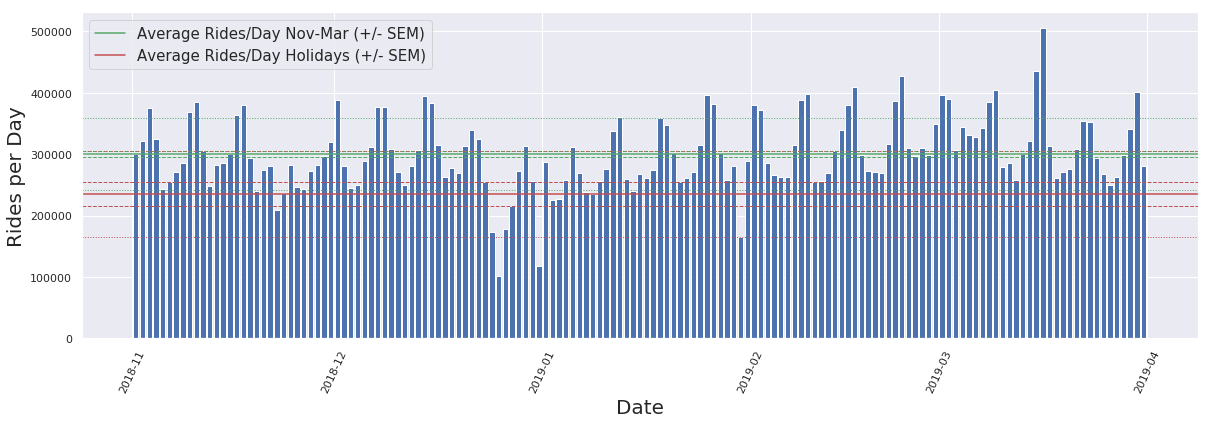

Average number of rides per day over the holiday season: 235064 +/- 18799 (measured over 14 days)
Average number of rides per day from November to March: 300272 +/- 4827 (measured over 151 days)


In [13]:
# Define the size of the figure to plot
plt.figure(figsize=(20,6))
# Compute a histogram of rides per day by binning up the data by days
rides_hist_90k = plt.hist(df_90k['Trip Start Timestamp'], bins=round(total_days_90k))
# Compute the bin centers for the histogram for plotting
bin_center_90k = (rides_hist_90k[1][:-1] + rides_hist_90k[1][1:]) / 2
# Compute the standard deviation of the histogram over days (and multiply by 500 to account for downsampling)
sigma_90k = np.std(rides_hist_90k[0])*500
# Calculate the standard error of the mean by dividing the standard deviation of the per-day histogram 
# by the square root of number of days averaged over.
sem_90k = sigma_90k/np.sqrt(total_days_90k)
sem_holidays = sigma_holidays/np.sqrt(total_days)
# Overwrite the plot to convert the y-axis to "rides per day" (multiplying by 500)
plt.bar(bin_center_90k, rides_hist_90k[0]*500)
plt.xticks(rotation=65)  # Rotate the x tick labels for readability
plt.ylabel('Rides per Day', fontsize=20)
plt.xlabel('Date', fontsize=20)
# Plot the average rides per day from the 90k sample as a horizontal green line
plt.axhline(y=rides_per_day_90k, xmin=0, xmax=1, c='g', label='Average Rides/Day Nov-Mar (+/- SEM)')
# Plot the +/- SEM interval for the 90k sample as dashed green lines
plt.axhline(y=rides_per_day_90k + sem_90k, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1)
plt.axhline(y=rides_per_day_90k - sem_90k, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1)
# Plot the +/- sigma interval for the 90k sample as dashed green lines
plt.axhline(y=rides_per_day_90k + sigma_90k, xmin=0, xmax=1, c='g', linestyle='dotted', linewidth=1)
plt.axhline(y=rides_per_day_90k - sigma_90k, xmin=0, xmax=1, c='g', linestyle='dotted', linewidth=1)
# Plot the average rides per day from the holiday sample as a horizontal red line
plt.axhline(y=rides_per_day, xmin=0, xmax=1, c='r', label='Average Rides/Day Holidays (+/- SEM)')
# Plot the +/- SEM interval for the holiday sample as dashed red lines
plt.axhline(y=rides_per_day + sem_holidays, xmin=0, xmax=1, c='r', linestyle='dashed', linewidth=1)
plt.axhline(y=rides_per_day - sem_holidays, xmin=0, xmax=1, c='r', linestyle='dashed', linewidth=1)
# Plot the +/- standard deviation interval for the holiday sample as dashed red lines
plt.axhline(y=rides_per_day + sigma_holidays, xmin=0, xmax=1, c='r', linestyle='dotted', linewidth=1)
plt.axhline(y=rides_per_day - sigma_holidays, xmin=0, xmax=1, c='r', linestyle='dotted', linewidth=1)
plt.legend(fontsize=15)
plt.show()

# Print out the averages and SEM for both samples
print(f'Average number of rides per day over the holiday season: {rides_per_day:.0f} +/- {sem_holidays:.0f} (measured over {total_days:.0f} days)')
print(f'Average number of rides per day from November to March: {rides_per_day_90k:.0f} +/- {sem_90k:.0f} (measured over {total_days_90k:.0f} days)')

### Questions:
1. How does the average number of rides per day for the holiday period compare with the larger dataset? 
2. What can you conclude (and with what level of confidence) about the average number of rides per day over the holidays vs. the full range of dates from November to March?
3. What else do you notice about the five month data set when it's plotted as a histogram above? How many peaks do you count in the histogram? How many weekends are there betwen November 1, 2018 and March 31, 2019?
4. What steps would you suggest to create a model that does a better job of predicting the number of rides there will actually be on any given day?



### Step 9: Reduce your uncertainty by recognizing weekly periodicity in your data.
The peaks in the histogram of rides per day above represent the number of rides taken on the weekends. This regular periodic signal demonstrates that the demand for rides on weekends is consistently higher than the demand during the middle of the week. Now your job is to use that information to improve your model! 

Your original model (the flat line average shown above) was a simple average over all time. The average of a periodic signal (like the demand for rides as a function of day of the week) is a reasonable measurement to make when you are concerned with averaging over timespans much longer than the period of the signal. For example, if you just wanted to know the average number of rides per year, you wouldn't be bothered by the fact that there are more rides on weekends than weekdays. 

In many cases, as an analyst you'll be calculating an average to be able to predict some future measure of the metric you're interested in. For example, if you're interested in knowing how many rides are likely to happen next year, you might take an average over the last several years as a way of predicting that value.

If instead you're interested in predicting the number of rides that will be taken next Monday, then your best bet would be to average a bunch of past Mondays to get your answer, because the number of rides per day depends strongly on which day of the week it is!

In the next code cell, you'll compute the average number of rides per day for each day of the week.

Prepare yourself, the next cell contains some mind-bending Python code. There's a lot going on here so take some time to read through the comments line by line.

In [0]:
# Start by creating a list of the days of the week
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# The next two lines are almost indecipherable to read but what's going on is:
# You're counting the number of rides that occurred on each calendar date, and identifying which day of the week it was
# This will allow you to compute averages (and standard deviations) for each individual weekday over this 21 week period.
daily_counts = df_90k['Trip Start Timestamp'].groupby(df_90k['Trip Start Timestamp'].dt.floor('d')).size().reset_index(name='Daily_Count')
daily_counts['Weekday'] = daily_counts['Trip Start Timestamp'].apply(lambda x: weekdays[x.weekday()])

In [15]:
# Create a new dataframe with number of rides per weekday and number of occurences of each weekday
ride_counts = pd.DataFrame(
    {
        'Weekday': weekdays,
        'Day_Count': [df_90k.loc[df_90k['Weekday']==day,'Trip Start Timestamp'].apply(lambda x: x.date()).nunique() for day in weekdays],
        'Sum_Ride_Count': daily_counts.groupby('Weekday').sum().loc[weekdays,'Daily_Count'],
        'StDev_Ride_Count': daily_counts.groupby('Weekday').std().loc[weekdays,'Daily_Count']
    }
).set_index('Weekday')

# Model weekday rides
ride_counts['Avg_Ride_Count'] = ride_counts['Sum_Ride_Count'] / ride_counts['Day_Count']
ride_counts['Weekday_Rides_Model'] = 500 * ride_counts['Avg_Ride_Count']
ride_counts['Weekday_Rides_Error'] = 500 * ride_counts['StDev_Ride_Count']
# Print out the new dataframe
ride_counts

,Day_Count,Sum_Ride_Count,StDev_Ride_Count,Avg_Ride_Count,Weekday_Rides_Model,Weekday_Rides_Error
Weekday,,,,,,
Monday,21,10575,87.393118,503.571429,251785.714286,43696.559198
Tuesday,21,11037,84.620075,525.571429,262785.714286,42310.037647
Wednesday,21,11243,76.000313,535.380952,267690.476190,38000.156641
Thursday,22,13026,74.828635,592.090909,296045.454545,37414.317698
Friday,22,15581,96.794299,708.227273,354113.636364,48397.149616
Saturday,22,16541,91.652187,751.863636,375931.818182,45826.093486
Sunday,22,12673,45.945596,576.045455,288022.727273,22972.798238


### Questions:
1. How many rides total occurred on a Monday in this data set? How many on a Thursday?
2. How many unique Tuesdays were there in the data set? How many Fridays?

### Step 9: Compute a new model to predict counts and count error for each day of the week
Now that you have recognized that the demand for rides fluctuates periodically on a weekly basis, and you have computed the actual demand for rides (total for each day) and how much it changes from week to week (the standard deviation) you're ready to create a new model! 

Run the next cell to convert your counts of rides and days into an estimate of rides per day and error.

Run the next cell to plot your new model against the data.

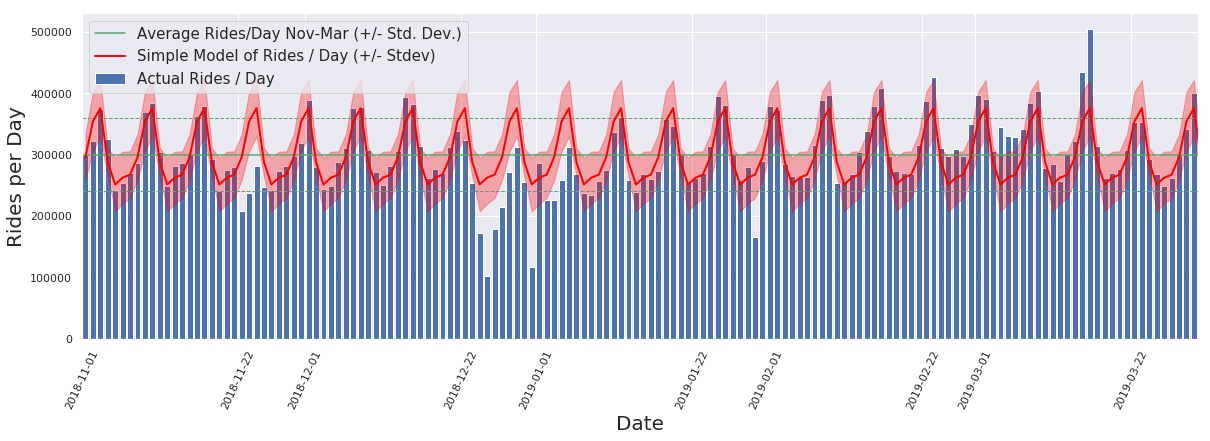

In [16]:

# Extract a multi-week model from the ride_counts dataframe (starting on a Thursday)
one_week_model = list(ride_counts['Weekday_Rides_Model'].values)
weekday_rides_model = np.array(one_week_model[3:] + 21*one_week_model)
one_week_error = list(ride_counts['Weekday_Rides_Error'].values)
weekday_rides_error = np.array(one_week_error[3:] + 21*one_week_error)
# Create a figure to display the model against actual rides per day
plt.figure(figsize=(20,6))
# Run histogram again as a hacky way of getting dates on the x-axis, then plot actual rides per day as a bar chart
plt.hist(df_90k['Trip Start Timestamp'], bins=round(total_days_90k))
plt.bar(bin_center_90k, rides_hist_90k[0]*500, color='b', label='Actual Rides / Day')
# Plot model rides per day as a red line
plt.axhline(y=rides_per_day_90k, xmin=0, xmax=1, c='g', label='Average Rides/Day Nov-Mar (+/- Std. Dev.)')
plt.axhline(y=rides_per_day_90k + sigma_90k, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1)
plt.axhline(y=rides_per_day_90k - sigma_90k, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1)
plt.plot(bin_center_90k, weekday_rides_model, color='red', linewidth=2, label='Simple Model of Rides / Day (+/- Stdev)')
plt.fill_between(bin_center_90k, weekday_rides_model-weekday_rides_error, weekday_rides_model+weekday_rides_error, color='red', alpha=0.3, zorder=2)
plt.xticks(rotation=65)  # Rotate the x tick labels for readability
plt.ylabel('Rides per Day', fontsize=20)
plt.xlabel('Date', fontsize=20)
# Set the limits of the x-axis to any date range (default is the full range)
plt.xlim(pd.Timestamp('2018-11-1'), pd.Timestamp('2019-3-31'))
plt.legend(fontsize=15)
plt.show()

**Congratulations!** You have significantly improved your model! In the plot above, your average rides per day value for each day of the week is shown in red with a margin of error of +/- one standard deviation.  

The blue bars represent actual demand for rides over each day in this time period and everywhere that your model in red is overlapping with the tops of the blue bars, you are predicting the correct number of rides (to within your margin of error). Just by calculating this simple average demand for rides over each day of the week you have created a powerful predictive model that captures the dynamic nature of your data!

### Step 10: Investigate anomalies
Also immediately obvious in the plot above are some areas where the actual demand does not match the model. As an analyst, you are equally excited by the places where your model fails as where it succeeds! 

<img src="https://pathstream-data-analytics.s3-us-west-2.amazonaws.com/rides_per_day_model.png" width=600 alt="Drawing" style="width: 200px;"/>

You can see clearly that the holiday period (Dec. 21, 2018 - Jan. 3, 2019), which you investigated previously, has a lower overall demand for rides than any other time period in the data set. But what about those other departures from the model? 

To zoom in on specfic parts of the plot above, and see clearly which days represent discrepancies with your model, change the date range in the following line of code:
```python
# Set the limits of the x-axis to any date range (default is the full range)
plt.xlim(pd.Timestamp('2018-11-1'), pd.Timestamp('2019-3-31'))
```
The defaults of Nov. 1 and Mar. 31 represent the first and last dates in the data set but you can change these to any other dates you like to zoom in on a section of the plot. Change these dates and investigate the following questions:

1. What would you expect is the reason for the low demand in late November?
2. What about that spike in mid-March? What might you guess is driving higher demand there?
3. Strangest of all, what is that one-day dip in late January? (here's [a tip](https://www.weather.gov/lot/RecordColdJan2019) if you get stumped!)
4. What would you suggest as improvements you could make to your model of rides per day to improve its accuracy to better accommodate these days or weeks when the average model doesn't fit?

### Step 11: Zoom in on a subset of data where the daily model fits well and investigate the prospect of creating an hourly prediction model.
You have done a fine job so far of creating a model that predicts the number of rides per day for each day of the week. Now the city wants you to improve the time resolution of your model to predict rides per hour throughout each day as well!

<img src="https://pathstream-data-analytics.s3-us-west-2.amazonaws.com/early_dec_rides.png" width=600 alt="Drawing" style="width: 200px;"/>


There are two weeks in December where your model appears to be a particlarly good fit (Dec. 3 - 16 shown above), so you select those dates to take a closer look. This data set spans two weeks from a Monday to a Sunday. Your next step is to extract this subset of data to investigate how your model fits when you increase the time resolution to hourly.

Run the next cell to extract the two week data set from early Dec., 2018.


In [0]:
# Set the start date/time as the first timestamp in the dataframe
start_timestamp = pd.Timestamp(2018, 12, 3, 0)
# Set the end date/time as the last timestamp in the dataframe
end_timestamp = pd.Timestamp(2018, 12, 17, 0)
# Extract a new dataframe that only includes two weeks of data in early February
df_dec = df_90k[df_90k['Trip Start Timestamp'] > start_timestamp] 
df_dec = df_dec[df_dec['Trip Start Timestamp'] < end_timestamp]
# Calculate the time difference in seconds between start and end date
time_delta = end_timestamp - start_timestamp
# Convert the time difference from seconds to days
total_hours = round(time_delta.total_seconds()/3600)

### Step 12: Create a new model by converting your daily model to its hourly equivalent

Run the next cell to take your daily rides model and make an hourly prediction by simply dividing daily rides by 24 (assuming an equal number of rides for each hour of the day)

In [18]:
'''
# Create an empty lists to hold the model with values for every hour model and error
oneweek_hourly_model = []
oneweek_hourly_error = []
# Loop over the values for daily rides and error for each day of the week
for daily_rides, daily_err in zip(one_week_model, one_week_error):
  # Populate your new hourly model with daily values divided by 24
  # Note: the *24 at the end actually replicates each value 24 times a list rather than multiplying the value inside the brackets by 24
  oneweek_hourly_model += [daily_rides/24] * 24
  oneweek_hourly_error += [daily_err/24] * 24

# Take the one week model and replicate it twice (list*2) and convert to a numerical array
avg_hourly_model = np.array(oneweek_hourly_model*2)
avg_hourly_error = np.array(oneweek_hourly_error*2)
'''

'\n# Create an empty lists to hold the model with values for every hour model and error\noneweek_hourly_model = []\noneweek_hourly_error = []\n# Loop over the values for daily rides and error for each day of the week\nfor daily_rides, daily_err in zip(one_week_model, one_week_error):\n  # Populate your new hourly model with daily values divided by 24\n  # Note: the *24 at the end actually replicates each value 24 times a list rather than multiplying the value inside the brackets by 24\n  oneweek_hourly_model += [daily_rides/24] * 24\n  oneweek_hourly_error += [daily_err/24] * 24\n\n# Take the one week model and replicate it twice (list*2) and convert to a numerical array\navg_hourly_model = np.array(oneweek_hourly_model*2)\navg_hourly_error = np.array(oneweek_hourly_error*2)\n'

In [0]:
# Create lists to model values for every hour model and error
# Loop over the values for daily rides and error for each day of the week
# Note: the *24 at the end actually replicates each value 24 times a list rather than multiplying the value inside the brackets by 24
oneweek_hourly_model = [[daily_rides/24] * 24 for daily_rides in one_week_model]
oneweek_hourly_error = [[daily_err/24] * 24 for daily_err in one_week_error]

# Take the one week model and replicate it twice (list*2) and convert to a numerical array
avg_hourly_model = np.array(oneweek_hourly_model*2).ravel()
avg_hourly_error = np.array(oneweek_hourly_error*2).ravel()

Great! Now you have converted your daily rides model into its hourly equivalent. 

Run the next cell to plot actual counts per hour vs. your new model.

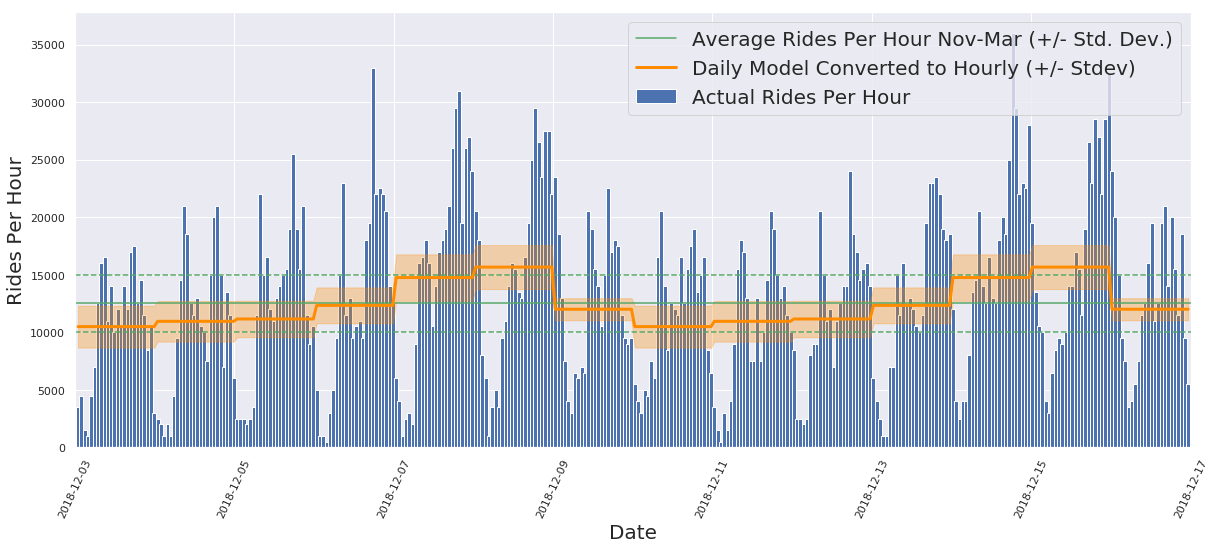

In [20]:
# Plot a histogram from start to end date binned by hour
plt.figure(figsize=(20,8))
# Generate a histogram with df.hist(). Note: this hourly histogram gets crowded if you plot more than two weeks or so of data
per_hour_hist = plt.hist(df_dec['Trip Start Timestamp'], bins=total_hours, label='Actual Rides Per Hour')
# Compute the bin centers for the histogram
bin_center = (per_hour_hist[1][:-1] + per_hour_hist[1][1:]) / 2
# Plot a bar chart (histogram) of rides per hour
plt.bar(bin_center, per_hour_hist[0]*500, width=0.05)
# Overplot the average rides per hour (dividing rides per day by 24)
plt.axhline(y=rides_per_day_90k/24, xmin=0, xmax=1, c='g', linewidth=1.5, label='Average Rides Per Hour Nov-Mar (+/- Std. Dev.)')
plt.axhline(y=rides_per_day_90k/24 + sigma_90k/24, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1.5)
plt.axhline(y=rides_per_day_90k/24 - sigma_90k/24, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1.5)
# Overplot the your new avg_hourly_model
plt.plot(bin_center, avg_hourly_model, color='darkorange', linewidth=3, label='Daily Model Converted to Hourly (+/- Stdev)')
plt.fill_between(bin_center, avg_hourly_model-avg_hourly_error, avg_hourly_model+avg_hourly_error, color='darkorange', alpha=0.3, zorder=2)
plt.xticks(rotation=65) # Rotate the x tick labels for readability
plt.ylabel('Rides Per Hour', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.legend(fontsize=20)
# Set the limits of the x-axis to any date range (default is the full range)
# The format for generating these timestamps is pd.Timestamp(YYYY, MM, DD, hour)
plt.xlim(pd.Timestamp(2018, 12, 3, 0), pd.Timestamp(2018, 12, 17, 0))
plt.show()

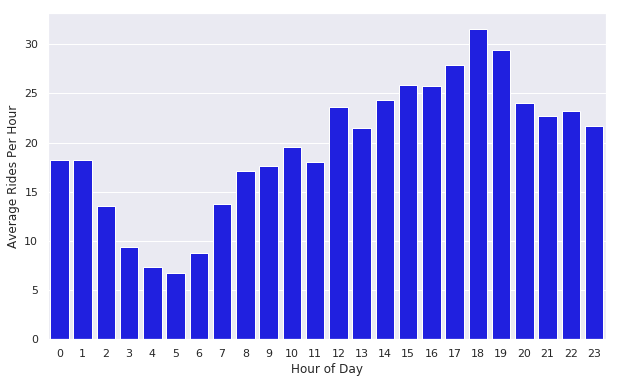

In [21]:
# Create a figure to display total rides as a function of time of day
plt.figure(figsize=(10, 6))
sns.barplot(x="Hour of Day", y="Hour of Day", data=df, estimator=lambda x: len(x)/14, color='blue')
plt.ylabel("Average Rides Per Hour")
plt.show()

### Questions:
1. What do you notice now about your model when compared to hourly ride counts? Does it still look like a good fit?
2. What sort of periodicities do you now observe in the data?

### Zoom in to get the details
Just like you did before, you can take a closer look by zooming in on the data. To do this, change the limits of the x-axis by changing the timestamps in the following line of code:
```python
# Set the limits of the x-axis to any date range (default is the full range)
# The format for generating these timestamps is pd.Timestamp(YYYY, MM, DD, hour)
plt.xlim(pd.Timestamp(2018, 12, 3, 0), pd.Timestamp(2018, 12, 17, 0))
```
### Questions (after zooming in on a couple days):
1. How many peaks typically occur in any given day? What time of day do these peaks correspond to? Why do you think this occurs?
2. What would be your approach to improving your model?

### Step 13: Make a better hourly model

In the plot above, you can see that simply diving daily counts by 24 is not going to cut it as an hourly model. Again you see periodicity, so as the simplest possible approach you will now do the same thing you did to estimate the demand for rides as a function of day of the week, but this time for hour of the day. Also, you won't forget about what you learned from the daily rides analysis. You'll fold in the dependence on weekday into your hourly estimates as well!

Run the next cell to compute your new hourly model.

In [22]:
'''
# Compute a conversion factor to adjust average rides per hour by the relative demand for rides based on day of week
weekday_factor = dict(zip(weekdays, list(np.array(one_week_model) / rides_per_day_90k)))
# Define dictionary object to hold the counts of how many rides occur at each hour of the day
hours_of_day = list(range(24))
hourly_ride_counts = {hour:[] for hour in hours_of_day}
counts_factor = {hour:[] for hour in hours_of_day}
# Define some variables to check and update with each iteration
previous_hour = -1
previous_day = ''
count = 0
init = 0
# Loop through the entire 90k data set and count the number of rides by hour of day
# Also record the relative demand factor based on which weekday you're counting ride for
for hour, day in zip(df_90k['Hour of Day'], df_90k['Weekday']):
  # If this is not the first iteration and we have found a new hour of the day, record the count and update tracking variables
  if init != 0 and hour != previous_hour:
    # Record the counts for the previous hour
    hourly_ride_counts[previous_hour].append(count)
    # Record the conversion factor based on weekday
    counts_factor[previous_hour].append(weekday_factor[day])
    # Update tracking variables
    previous_hour = hour
    if day != previous_day:
      previous_day = day
    count = 0
  # Add one to the count
  count += 1
  # If this is the first iteration set previous_hour and day to the first record in the data set
  if init == 0:
    init = 1
    previous_hour = hour
    previous_day = day
    
# Compute how many of each hour we counted, total rides, and standard deviation
unique_hour_counts = []
total_rides_per_hour = []
stdev_rides_per_hour = []
for hour, counts in hourly_ride_counts.items():
  unique_hour_counts.append(len(counts))
  total_rides_per_hour.append(np.sum(counts))
  stdev_rides_per_hour.append(np.std(counts))

# Print out the results
print(len(unique_hour_counts), unique_hour_counts)
print(len(total_rides_per_hour), total_rides_per_hour)
print(len(stdev_rides_per_hour), stdev_rides_per_hour)
'''

"\n# Compute a conversion factor to adjust average rides per hour by the relative demand for rides based on day of week\nweekday_factor = dict(zip(weekdays, list(np.array(one_week_model) / rides_per_day_90k)))\n# Define dictionary object to hold the counts of how many rides occur at each hour of the day\nhours_of_day = list(range(24))\nhourly_ride_counts = {hour:[] for hour in hours_of_day}\ncounts_factor = {hour:[] for hour in hours_of_day}\n# Define some variables to check and update with each iteration\nprevious_hour = -1\nprevious_day = ''\ncount = 0\ninit = 0\n# Loop through the entire 90k data set and count the number of rides by hour of day\n# Also record the relative demand factor based on which weekday you're counting ride for\nfor hour, day in zip(df_90k['Hour of Day'], df_90k['Weekday']):\n  # If this is not the first iteration and we have found a new hour of the day, record the count and update tracking variables\n  if init != 0 and hour != previous_hour:\n    # Record the 

In [23]:
hours_of_day = list(range(24))

hourly_summary = pd.DataFrame({
    'hour': hours_of_day,
    'unique_hour_counts': [len(df_90k[df_90k['Hour of Day']==hr].groupby(df_90k['Trip Start Timestamp'].dt.floor('d')).size()) for hr in hours_of_day], 
    'total_rides_per_hour': [len(df_90k.loc[df_90k['Hour of Day']==hr,'Trip Start Timestamp']) for hr in hours_of_day], 
    'stdev_rides_per_hour': [np.std(df_90k[df_90k['Hour of Day']==hr].groupby(df_90k['Trip Start Timestamp'].dt.floor('d')).size()) for hr in hours_of_day]
}).set_index('hour')

hourly_summary

,unique_hour_counts,total_rides_per_hour,stdev_rides_per_hour
hour,,,
0,151,2938,13.573316
1,151,2170,13.184687
2,147,1485,9.184973
3,144,1032,5.840472
4,151,996,3.487307
5,150,1240,3.334000
6,150,2114,5.697188
7,151,3540,10.470796
8,151,4728,13.205550


Run the next cell to shape your hourly results into a model for plotting

In [24]:
'''
# Convert lists to numerical arrays and multiply by 500 (downsampling factor)
# Divide total hourly ride counts by the number of days in the 90k sample
avg_hourly_rides = 500*np.array(total_rides_per_hour)/total_days_90k
hourly_rides_error = 500*np.array(stdev_rides_per_hour)
# Create a "oneweek_hourly_model" and error by replicating the array of average rides per hour 7 times (once for each day of the week)
oneweek_hourly_model = []
oneweek_hourly_error = []
# Loop through each day of the week creating a model by multiplying avg_hourly_rides and error by the conversion factor derived from the daily model
for weekday, factor in weekday_factor.items():
  # The += here extends the original list by another 24 elements each time
  oneweek_hourly_model += list(avg_hourly_rides*factor)
  oneweek_hourly_error += list(hourly_rides_error*factor)

# Create a twoweek_hourly_model by multiplying the list of values *2 (replicating the list twice) and converting to a numerical array.
twoweek_hourly_model = np.array(oneweek_hourly_model*2)
twoweek_hourly_error = np.array(oneweek_hourly_error*2)

'''

'\n# Convert lists to numerical arrays and multiply by 500 (downsampling factor)\n# Divide total hourly ride counts by the number of days in the 90k sample\navg_hourly_rides = 500*np.array(total_rides_per_hour)/total_days_90k\nhourly_rides_error = 500*np.array(stdev_rides_per_hour)\n# Create a "oneweek_hourly_model" and error by replicating the array of average rides per hour 7 times (once for each day of the week)\noneweek_hourly_model = []\noneweek_hourly_error = []\n# Loop through each day of the week creating a model by multiplying avg_hourly_rides and error by the conversion factor derived from the daily model\nfor weekday, factor in weekday_factor.items():\n  # The += here extends the original list by another 24 elements each time\n  oneweek_hourly_model += list(avg_hourly_rides*factor)\n  oneweek_hourly_error += list(hourly_rides_error*factor)\n\n# Create a twoweek_hourly_model by multiplying the list of values *2 (replicating the list twice) and converting to a numerical array.

In [0]:
# Convert lists to numerical arrays and multiply by 500 (downsampling factor)
# Divide total hourly ride counts by the number of days in the 90k sample
avg_hourly_rides = 500*hourly_summary['total_rides_per_hour']/total_days_90k
hourly_rides_error = 500*hourly_summary['stdev_rides_per_hour']

# Loop through each day of the week creating a model by multiplying avg_hourly_rides and error by the conversion factor derived from the daily model
oneweek_hourly_model = np.array([avg_hourly_rides*ride_counts.loc[weekday, 'Weekday_Rides_Model']/rides_per_day_90k for weekday in weekdays]).ravel()
oneweek_hourly_error = np.array([hourly_rides_error*ride_counts.loc[weekday, 'Weekday_Rides_Model']/rides_per_day_90k for weekday in weekdays]).ravel()

# Create a twoweek_hourly_model by multiplying the list of values *2 (replicating the list twice) and converting to a numerical array.
twoweek_hourly_model = np.tile(oneweek_hourly_model, 2)
twoweek_hourly_error = np.tile(oneweek_hourly_error, 2)

Run the next cell to plot up your new model for comparison!

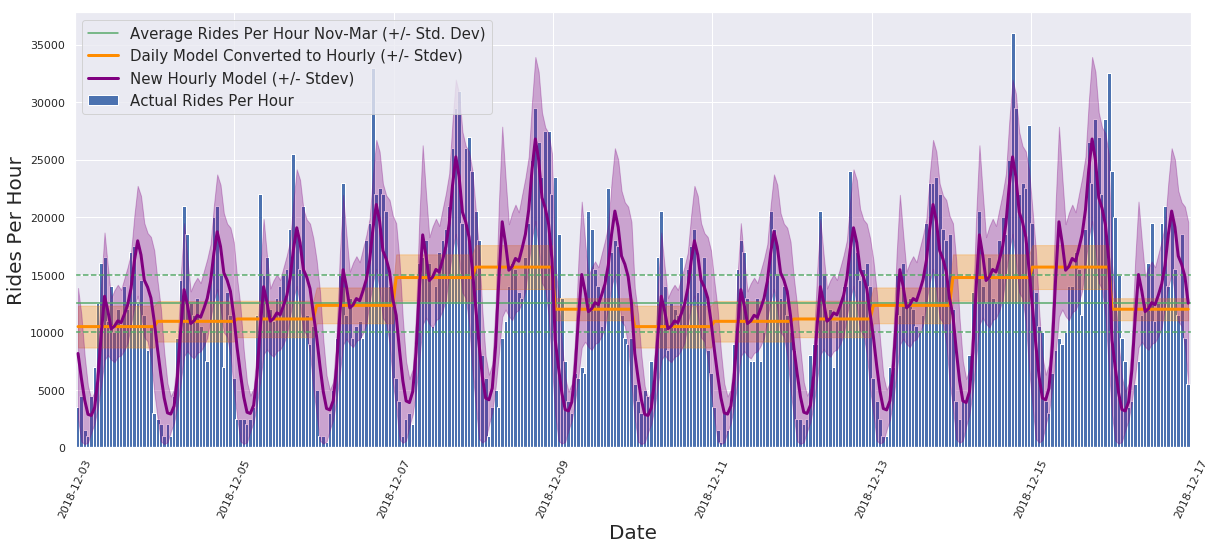

In [26]:
# Plot a histogram by hour and overplot all the models so far.
plt.figure(figsize=(20,8))
# Generate a histogram with df.hist(). Note: this hourly histogram gets crowded if you plot more than two weeks or so of data
per_hour_hist = plt.hist(df_dec['Trip Start Timestamp'], bins=total_hours, label='Actual Rides Per Hour')
bin_center = (per_hour_hist[1][:-1] + per_hour_hist[1][1:]) / 2
plt.bar(bin_center, per_hour_hist[0]*500, width=0.05)
plt.axhline(y=rides_per_day_90k/24, xmin=0, xmax=1, c='g', linewidth=1.5, label='Average Rides Per Hour Nov-Mar (+/- Std. Dev)')
plt.axhline(y=rides_per_day_90k/24 + sigma_90k/24, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1.5)
plt.axhline(y=rides_per_day_90k/24 - sigma_90k/24, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1.5)
# Overplot the avg_hourly_model
plt.plot(bin_center, avg_hourly_model, color='darkorange', linewidth=3, label='Daily Model Converted to Hourly (+/- Stdev)')
plt.fill_between(bin_center, avg_hourly_model-avg_hourly_error, avg_hourly_model+avg_hourly_error, color='darkorange', alpha=0.3, zorder=2)
# Overplot your new twoweek_hourly_model
plt.plot(bin_center, twoweek_hourly_model, color='purple', linewidth=3, label='New Hourly Model (+/- Stdev)')
plt.fill_between(bin_center, twoweek_hourly_model-twoweek_hourly_error, twoweek_hourly_model+twoweek_hourly_error, color='purple', alpha=0.3, zorder=2)
plt.xticks(rotation=65) # Rotate the x tick labels for readability
plt.ylabel('Rides Per Hour', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
# Set the limits of the x-axis to any date range (default is the full range)
# The format for generating these timestamps is pd.Timestamp(YYYY, MM, DD, hour)
plt.xlim(pd.Timestamp(2018, 12, 3, 0), pd.Timestamp(2018, 12, 17, 0))
plt.show()

**Well done!** Very Impressive, you now have a model of the demand for rides at each hour of the day for each day of the week! As you can see, your model isn't perfect, but it does a better job of modeling hourly ride counts than either a flat average over many days or a per-day average. Now you are able to present the city of Chicago with a model that does a reasonable job of predicting the number of rides to expect on average for any day of the week and any hour of the day. You accomplished all of this without any fancy or complicated modeling, only simple averages and standard deviations. Nice work!

### Questions:
1. Where does your model seem to fit well? Where does it not fit so well?
2. At this point, what kind of approach might you take to improving your model?

To investigate your model fit more closely, you can again zoom in to view individual days by changing the limits on the x-axis with this line of code:
```python
# Set the limits of the x-axis to any date range (default is the full range)
# The format for generating these timestamps is pd.Timestamp(YYYY, MM, DD, hour)
plt.xlim(pd.Timestamp(2018, 12, 3, 0), pd.Timestamp(2018, 12, 17, 0))
```

# Congratulations! You've come to the end of this notebook!

Great job carrying out this exploratory analysis of the Chicago rideshare dataset. You now have a wealth of insights to present regarding the statistics of rides in Chicago and key metrics that affect drivers. Write up your results along with any supporting figures you would like to use from this notebook or your work in Google sheets. 